In [0]:
# Automatically reload external libraries that change
%reload_ext autoreload
%autoreload 2
# If a matplotlib plot command is issued, display the results in the notebook
%matplotlib inline

In [2]:
# Upload data
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle competitions download -c tgs-salt-identification-challenge

In [0]:
#!unzip train.zip

In [6]:
!tar xvzf track_shower_images.tar.gz

Images/
Images/Hits/
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_0_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_100_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_101_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_102_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_103_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_104_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_105_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_106_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_107_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_108_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_109_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_10_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_110_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_111_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_112_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_113_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_114_0.png
Images/Hits/Image_DUNEFD_MC11_CaloHitListW_115_0.png
Images/Hits/Image_DUNEFD_MC1

In [7]:
# Upload supporting python modules
from google.colab import files
files.upload()
from data import SegmentationBunch
from transforms import Rescale, ToTensor
from unet import UNet

Saving data.py to data.py
Saving transforms.py to transforms.py
Saving unet.py to unet.py


In [0]:
from data import open_image
img = open_image("Images/Truth/Image_DUNEFD_MC11_CaloHitListW_979_0.png")

In [9]:
img.size

(512, 208)

In [0]:
from torchvision import transforms
from torch.autograd import Variable
import torch
import torch.optim as opt
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [0]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
#bunch = SegmentationBunch("Images", "Hits", "Truth", batch_size=64, valid_pct = 0.2,
#    transform=transforms.Compose([Rescale((512, 208)), ToTensor()]))
bunch = SegmentationBunch("Images", "Hits", "Truth", batch_size=32, valid_pct = 0.2,
    transform=transforms.Compose([ToTensor(True)]))

In [0]:
void_code = 0

def accuracy(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
# Create the network, loss function and optimizer
n_classes = 3
model = UNet(1, n_classes = n_classes, n_filters = 16, y_range = (0, n_classes))
#print(model)
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.modules.loss.BCELoss()
optim = opt.Adam(model.parameters())

torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([32, 3, 208, 512])
torch.Size([16, 3, 208, 512])
Epoch 1 : loss 0.8431915545463562 acc 0.6157364773750306:


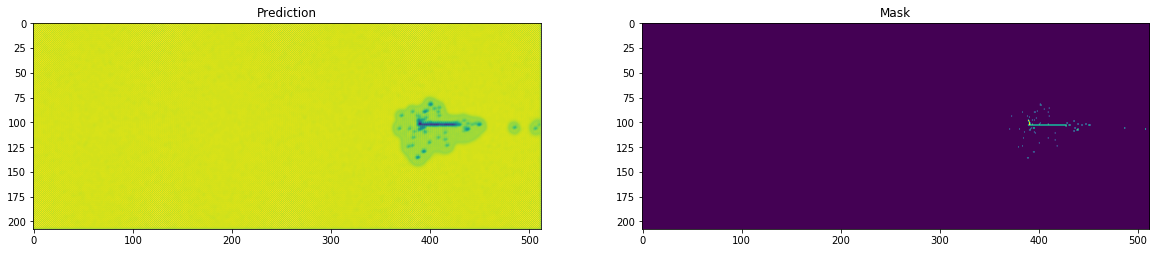

In [16]:
# Run a single epoch
for epoch in list(range(1)):
    optim.zero_grad()
    train_dl = bunch.train_dl
    losses = np.zeros(len(train_dl))
    accuracies = np.zeros(len(train_dl))
    for i, batch in enumerate(train_dl):
        images, masks = batch
        x = Variable(images)
        y = Variable(masks)
        pred = model.forward(x)
        if i == (len(train_dl) - 1):
            # Probably need to think a little harder about what is being
            # displayed here, particularly for the prediction
            # Probably ok to just display the masks, as that should
            # allocate a colour to each class code, but the prediction
            # probably needs to be converted to 1 channel via an argmax call
            # and then rendered
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))
            ax1.imshow(pred.detach().numpy()[0, 0, ...], interpolation = 'bilinear')
            ax1.set_title('Prediction')

            ax2.imshow(y.detach().numpy()[0, ...], interpolation = 'bilinear')
            ax2.set_title('Mask')

        loss = loss_fn(pred, y)
        losses[i] = loss.item()

        acc = accuracy(pred, y)
        accuracies[i] = acc

        loss.backward()
        optim.step()
    print("Epoch {} : loss {} acc {}:".format(epoch + 1, losses.mean(),
        accuracies.mean()))